In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00411dd48561a432a668494ff8eb1f72


In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

613

In [15]:
coordinates

[(-72.57802836440472, -114.02754148164266),
 (-19.16230606836487, -103.29389301688136),
 (5.569464571778923, 21.860008088292915),
 (-46.15975526215084, -6.9812289440530435),
 (-60.91292281063623, 102.76518333547148),
 (-78.29117360363428, -9.957484552581235),
 (-13.029574212807773, -172.6094837966101),
 (-66.67497280495124, -16.568902473555568),
 (-55.90177219976427, -27.53701676517943),
 (55.18062315186569, -117.37284436292472),
 (86.34805803755967, -161.33878975864604),
 (-50.758896967599505, -138.33696042764018),
 (-70.6023148333717, -139.66612500120607),
 (-73.28724832712193, -22.275869690061143),
 (-17.45390497150892, -128.90328462458262),
 (86.28852871041218, -9.043110091074936),
 (35.06625664593, -117.45919257532552),
 (-49.61963067462463, 69.19470882788053),
 (27.365413967996517, -179.36510915176925),
 (-51.515664033457256, -14.12440365261537),
 (83.3427830962508, -72.89780614544054),
 (4.247535240038374, -2.309329161668586),
 (-11.348747909368825, -63.42771734032735),
 (55.217

In [19]:
!pip install citipy

In [20]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | alindao
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | vaisala
City not found. Skipping...
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | valleyview
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | barstow
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | axim
Processing Record 20 of Set 1 | ouro preto do oeste
Processing Record 21 of Set 1 | meadow lake
Processing 

Processing Record 38 of Set 4 | nouadhibou
Processing Record 39 of Set 4 | mandalgovi
Processing Record 40 of Set 4 | meulaboh
Processing Record 41 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 4 | kikwit
Processing Record 43 of Set 4 | fare
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | ahuimanu
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | san lorenzo
Processing Record 48 of Set 4 | sindor
Processing Record 49 of Set 4 | westport
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | olafsvik
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | lahaina
Processing Record 5 of Set 5 | egvekinot
Processing Record 6 of Set 5 | hilo
Processing Record 7 of Set 5 | wabana
Processing Record 8 of Set 5 | stornoway
Processing Record 9 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 5 | gr

Processing Record 31 of Set 8 | saskylakh
Processing Record 32 of Set 8 | talant
Processing Record 33 of Set 8 | asosa
Processing Record 34 of Set 8 | itaqui
Processing Record 35 of Set 8 | meyungs
City not found. Skipping...
Processing Record 36 of Set 8 | puerto quijarro
Processing Record 37 of Set 8 | kaputa
Processing Record 38 of Set 8 | matara
Processing Record 39 of Set 8 | big spring
Processing Record 40 of Set 8 | tadine
Processing Record 41 of Set 8 | mezen
Processing Record 42 of Set 8 | cap malheureux
Processing Record 43 of Set 8 | alzamay
Processing Record 44 of Set 8 | veraval
Processing Record 45 of Set 8 | lisakovsk
Processing Record 46 of Set 8 | inhambane
Processing Record 47 of Set 8 | kavieng
Processing Record 48 of Set 8 | zgierz
Processing Record 49 of Set 8 | ortigueira
Processing Record 50 of Set 8 | balabac
Processing Record 1 of Set 9 | enterprise
Processing Record 2 of Set 9 | vanimo
Processing Record 3 of Set 9 | dongargaon
Processing Record 4 of Set 9 | na

Processing Record 20 of Set 12 | bure
Processing Record 21 of Set 12 | shilong
Processing Record 22 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 23 of Set 12 | barbalha
Processing Record 24 of Set 12 | lobez
Processing Record 25 of Set 12 | iquitos
Processing Record 26 of Set 12 | pangai
Processing Record 27 of Set 12 | jishu
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | tilichiki
Processing Record 30 of Set 12 | gorontalo
Processing Record 31 of Set 12 | cascais
Processing Record 32 of Set 12 | ruidoso
Processing Record 33 of Set 12 | rayong
Processing Record 34 of Set 12 | lukovetskiy
Processing Record 35 of Set 12 | callaway
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | alexandria
Processing Record 38 of Set 12 | ammon
Processing Record 39 of Set 12 | corozal
Processing Record 40 of Set 12 | carballo
Processing Record 41 of Set 12 | marcona
City not found. Skipping...
Processing Record 42 of Set 12 | da

In [18]:
len(city_data)

564

In [21]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,44.71,65,40,44.87,CL,2022-04-03 15:45:26
1,Puerto Ayora,-0.7393,-90.3518,84.16,78,89,10.60,EC,2022-04-03 15:47:01
2,Alindao,5.0267,21.2088,86.81,48,86,5.44,CF,2022-04-03 15:47:02
3,Saldanha,-33.0117,17.9442,73.45,68,0,6.69,ZA,2022-04-03 15:47:02
4,Albany,42.6001,-73.9662,46.17,65,100,1.01,US,2022-04-03 15:44:06
5,Cape Town,-33.9258,18.4232,73.11,66,40,12.66,ZA,2022-04-03 15:42:35
6,Chuy,-33.6971,-53.4616,72.30,66,100,11.86,UY,2022-04-03 15:47:02
7,Valleyview,55.0667,-117.2859,30.24,64,75,13.80,CA,2022-04-03 15:47:03
8,Barrow,71.2906,-156.7887,-7.58,71,100,12.66,US,2022-04-03 15:47:03
9,Rikitea,-23.1203,-134.9692,76.10,64,44,9.04,PF,2022-04-03 15:47:03


In [15]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-04-03 14:41:36,-0.7393,-90.3518,80.56,79,86,10.13
1,Ilhabela,BR,2022-04-03 14:41:37,-23.7781,-45.3581,79.66,74,15,5.79
2,Barrow,US,2022-04-03 14:40:42,71.2906,-156.7887,-7.58,71,100,13.80
3,Hofn,IS,2022-04-03 14:41:37,64.2539,-15.2082,41.02,93,100,5.75
4,Faanui,PF,2022-04-03 14:41:38,-16.4833,-151.7500,80.87,76,10,7.54
5,Hermanus,ZA,2022-04-03 14:41:38,-34.4187,19.2345,74.80,63,31,12.57
6,Rikitea,PF,2022-04-03 14:39:29,-23.1203,-134.9692,75.87,64,41,8.79
7,Avarua,CK,2022-04-03 14:41:38,-21.2078,-159.7750,73.45,94,100,2.30
8,Bulawayo,ZW,2022-04-03 14:41:39,-20.1500,28.5833,72.52,57,74,6.49
9,Along,IN,2022-04-03 14:41:39,28.1667,94.7667,66.76,98,100,0.31


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Import time module
import time
# Get today's date in seconds
today = time.time()
today

1649001184.084652

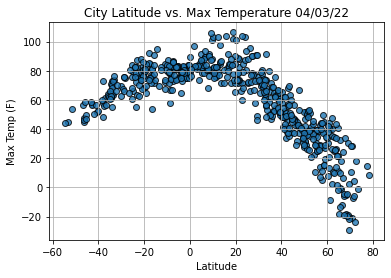

In [24]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

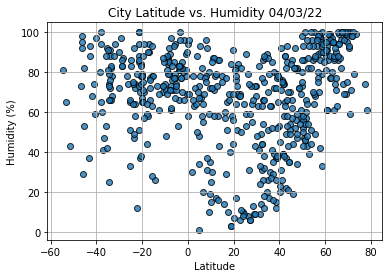

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

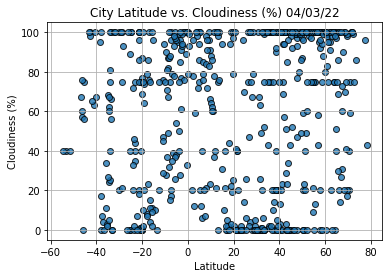

In [26]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

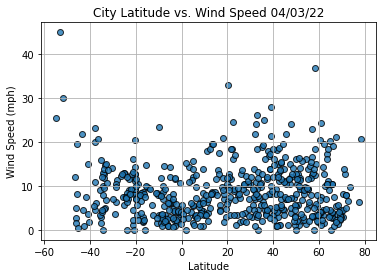

In [27]:
# Build the scatter plot for lat. vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress
import textwrap

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")

In [29]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Lat                       22.0752
Lng                      -159.319
Max Temp                    72.12
Humidity                       84
Cloudiness                     20
Wind Speed                  18.41
Country                        US
Date          2022-04-03 15:44:54
Name: 13, dtype: object

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Alindao,5.0267,21.2088,86.81,48,86,5.44,CF,2022-04-03 15:47:02
4,Albany,42.6001,-73.9662,46.17,65,100,1.01,US,2022-04-03 15:44:06
7,Valleyview,55.0667,-117.2859,30.24,64,75,13.80,CA,2022-04-03 15:47:03
8,Barrow,71.2906,-156.7887,-7.58,71,100,12.66,US,2022-04-03 15:47:03
11,Barstow,34.8986,-117.0228,61.16,51,100,9.75,US,2022-04-03 15:47:04


In [31]:
# Create dataframes for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [32]:
len(northern_hemi_df)

380

In [33]:
len(southern_hemi_df)

184

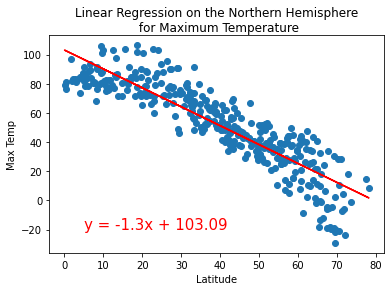

The p-value is: 0.000
The r-value is: -0.888


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))

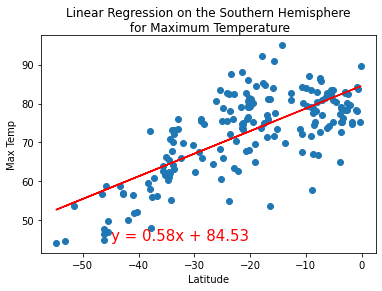

The p-value is: 0.000
The r-value is: 0.726


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

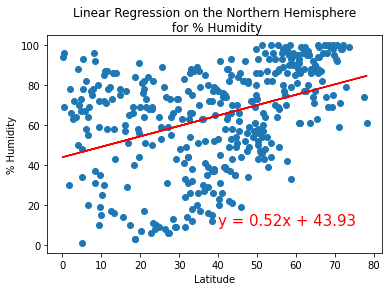

The p-value is: 0.000
The r-value is: 0.395


In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

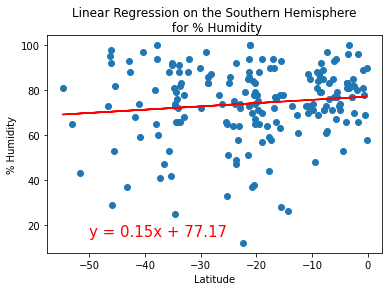

The p-value is: 0.108
The r-value is: 0.119


In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

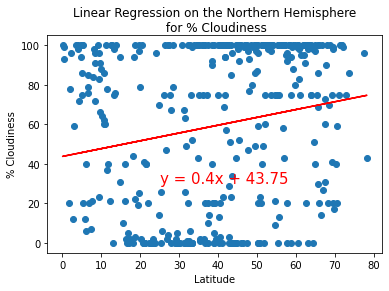

The p-value is: 0.000
The r-value is: 0.192


In [38]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

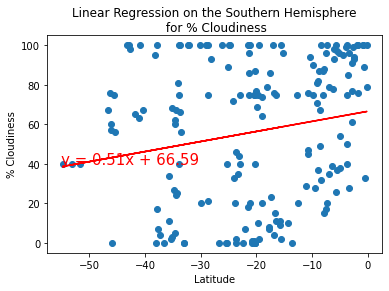

The p-value is: 0.010
The r-value is: 0.188


In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

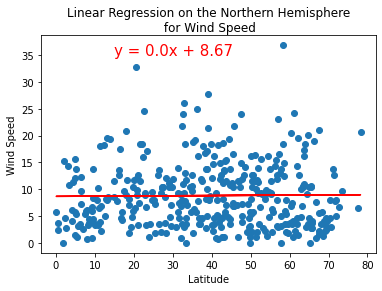

The p-value is: 0.812
The r-value is: 0.012


In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

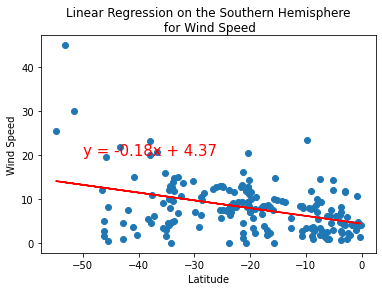

The p-value is: 0.000
The r-value is: -0.394


In [41]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))